# Praktikum 2: Korrelationsanalyse

## Aufgabe: Korrelationsanalyse der YouTube Daten

- Nehmt die YouTube Daten aus dem 1. Praktikum
- Nutzt die bereinigten Daten aus Aufgabe 1 und exportiert sie als `parquet`-Datei. Tipp: nutzt die Funktion `to_parquet()`
- Sucht euch 2 Merkmale aus, die ihr auf Korrelation testen wollt
- Visualisiert die beiden Merkmale mit einem Scatter-Plot. Nutzt dafür `seaborn`
- Führt die Korrelationsanalyse mit dem passenden Algorithmus (Korrelationskoeffizienten) durch
- Nutzt dafür die Pandas-funktion `corr()`

- Interpretiert das Ergebnis

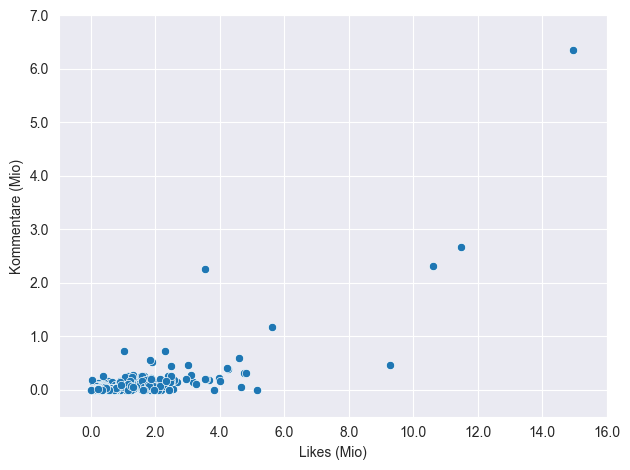

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

youtube_data = pd.read_parquet('cleaned.parquet')

# Merkmal 1: Dislikes_cleaned   Merkmal 2: comments_cleaned

sns.scatterplot(data=youtube_data, x='likes_cleaned', y='comments_cleaned')
ax = plt.gca()
ax.set_xticks(ax.get_xticks(), [f'{x}' for x in ax.get_xticks() / 1000000])
ax.set_yticks(ax.get_yticks(), [f'{y}' for y in ax.get_yticks() / 1000000])
ax.set_ylabel('Kommentare (Mio)')
ax.set_xlabel('Likes (Mio)')
ax.set_xlim((-1000000, max(ax.get_xticks())))
ax.set_ylim((-500000, max(ax.get_yticks())))
plt.tight_layout()
plt.show()




In [33]:
#Korrelationsanalyse
columns = ['likes_cleaned', 'comments_cleaned']
likes_comments = youtube_data[columns].copy()
likes_comments.corr(method='pearson')

,likes_cleaned,comments_cleaned
likes_cleaned,1.000000,0.732352
comments_cleaned,0.732352,1.000000


Das Ergebnis ist 0,7323. Das heißt, dass die Korrelation zwischen Kommentare und Likes nah bei der 1 liegt. Hier würde also ein positiver Zusammenhang vorliegen zwischen den Likes und  den Kommentaren, also wenn die Likes steigen, dann steigen auch die Kommentare (Gerade mit positiver Steigung)